In [19]:
import cv2
import math
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
%matplotlibinline

In [2]:
num_img = 4

In [75]:
gradx = np.array([[-1,1]])
grady = np.array([[-1],[1]])
print(gradx.shape, grady.shape)

(1, 2) (2, 1)


In [4]:
img = [0 for _ in range (num_img)]
for i in range(num_img):
    img[i] = cv2.imread('{}.png'.format(i))

In [5]:
img = np.array(img)

In [6]:
img[0].shape

(117, 117, 3)

In [99]:
grad_img_x = [0 for _ in range (num_img)]
grad_img_y = [0 for _ in range (num_img)]
abs_sobelx = [0 for _ in range (num_img)]
abs_sobely = [0 for _ in range (num_img)]
for i in range(num_img):
    grad_img_x[i] = cv2.filter2D(img[i], -1, gradx)
    grad_img_y[i] = cv2.filter2D(img[i], -1, grady)
    # to see negative slopes
    abs_sobelx[i] = np.absolute(grad_img_x[i]) #minus -> plus
    abs_sobelx[i] = np.uint8(abs_sobelx[i])
    abs_sobely[i] = np.absolute(grad_img_y[i])
    abs_sobely[i]= np.uint8(abs_sobely[i])
grad_img_x = np.array(grad_img_x)
grad_img_y = np.array(grad_img_y)

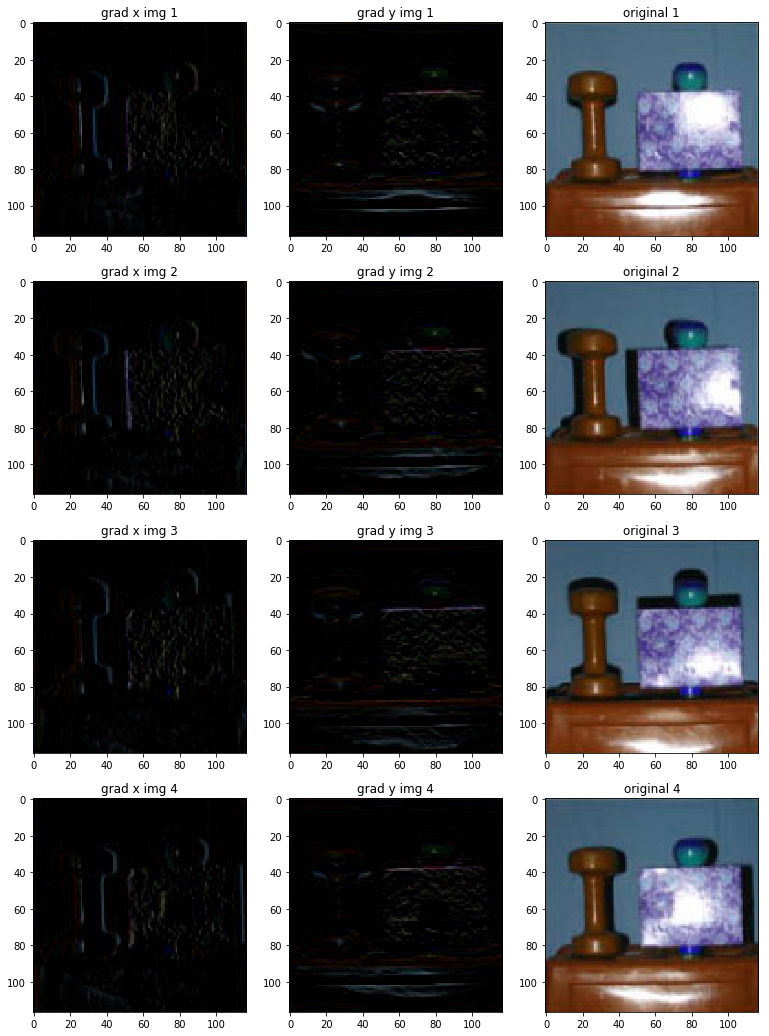

In [104]:
plt.figure(figsize=(13,23))
j = 1
for i in range(num_img):
    plt.subplot(num_img+1,3,j)
    plt.imshow(abs_sobelx[i])
    plt.title('grad x img {}'.format(i+1))
    plt.subplot(num_img+1,3,j+1)
    plt.imshow(abs_sobely[i])
    plt.title('grad y img {}'.format(i+1))
    plt.subplot(num_img+1,3,j+2)
    plt.imshow(img[i])
    plt.title('original {}'.format(i+1))
    j = j + 3
    '''
    cv2.imshow('gradient x of image {}'.format(i), abs_sobelx[i])
    cv2.waitKey()
    cv2.destroyAllWindows()
    cv2.imshow('gradient y of image {}'.format(i), abs_sobely[i])
    cv2.waitKey()
    cv2.destroyAllWindows()
    '''

In [80]:
grad_img_y.shape

(4, 117, 117, 3)

In [81]:
median_imgx = np.median(grad_img_x, axis=0)
median_imgy = np.median(grad_img_y, axis=0)
median_absx = np.uint8(np.absolute(median_imgx))
median_absy = np.uint8(np.absolute(median_imgy))

In [82]:
median_imgx.shape

(117, 117, 3)

Text(0.5, 1.0, 'median_absy')

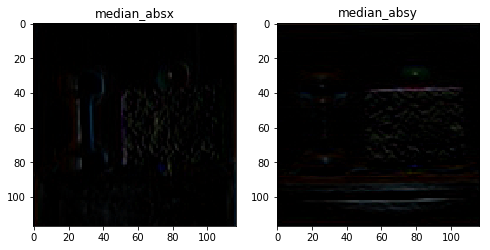

In [83]:
plt.figure(figsize=(8,15))
plt.subplot(1,2,1)
plt.imshow(median_absx)
plt.title('median_absx')
plt.subplot(1,2,2)
plt.imshow(median_absy)
plt.title('median_absy')

In [84]:
div_G = cv2.filter2D(median_imgx, -1, gradx) + cv2.filter2D(median_imgy, -1, grady)

In [85]:
div_G.shape

(117, 117, 3)

In [86]:
div_G_abs = np.uint8(np.absolute(div_G))

Text(0.5, 1.0, 'div_G_abs')

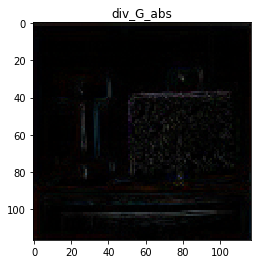

In [87]:
plt.imshow(div_G_abs)
plt.title('div_G_abs')